In [1]:
from preamble import *
%matplotlib notebook

In [2]:
bike_data = pd.read_csv("data/bike_day_dummies.csv")

In [3]:
bike_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,...,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,"weathersit_clear, partly cloudy","weathersit_light snow, light rain","weathersit_mist, cloudy",cnt
0,0,0,0.344167,0.363625,0.805833,0.160446,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,985
1,0,0,0.363478,0.353739,0.696087,0.248539,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,801
2,0,1,0.196364,0.189405,0.437273,0.248309,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1349
3,0,1,0.200000,0.212122,0.590435,0.160296,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1562
4,0,1,0.226957,0.229270,0.436957,0.186900,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1600


In [6]:
bike_data.shape

(731, 27)

In [41]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(bike_data)
ocs = OneClassSVM(gamma=0.1, nu=.9)
ocs.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.9, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [43]:
np.bincount(ocs.predict(bike_data).astype(np.int) + 1)

array([731])

In [44]:
from sklearn.ensemble import IsolationForest

In [48]:
iso = IsolationForest(contamination=0.01).fit(bike_data)

In [ ]:
iso.

In [49]:
np.bincount(iso.predict(bike_data) + 1)

array([  8,   0, 723])

In [50]:
bike_data[iso.predict(bike_data) == -1]

,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,...,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,"weathersit_clear, partly cloudy","weathersit_light snow, light rain","weathersit_mist, cloudy",cnt
16,1,0,0.175833,0.176771,0.537500,0.194017,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1000
25,0,1,0.217500,0.203600,0.862500,0.293850,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,506
51,1,0,0.303333,0.284075,0.605000,0.307846,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1107
105,0,0,0.430833,0.425492,0.888333,0.340808,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,795
184,1,0,0.726667,0.665417,0.637917,0.081479,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6043
247,1,0,0.673333,0.625646,0.790417,0.212696,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3351
301,0,0,0.254167,0.227913,0.882500,0.351371,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,627
366,1,0,0.273043,0.252304,0.381304,0.329665,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1951


In [51]:
bike_data.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weathersit_clear, partly cloudy',
       'weathersit_light snow, light rain', 'weathersit_mist, cloudy', 'cnt'],
      dtype='object')

In [105]:
data = pd.read_csv("data/bank-campaign.csv")
X = data.drop("target", axis=1)

In [55]:
iso = IsolationForest(contamination=0.01).fit(X)

In [56]:
preds = iso.predict(X)


ValueError: The first argument of bincount must be non-negative

In [57]:
np.bincount(preds + 1)

array([  412,     0, 40776])

In [60]:
data.duration.min()

0

In [61]:
data.duration.max()

4918

In [62]:
data.duration.median()

180.0

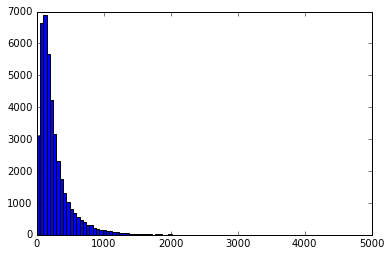

In [64]:
plt.figure()
plt.hist(data.duration, bins=100);

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(MinMaxScaler().fit_transform(X))

In [92]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

<IPython.core.display.Javascript object>


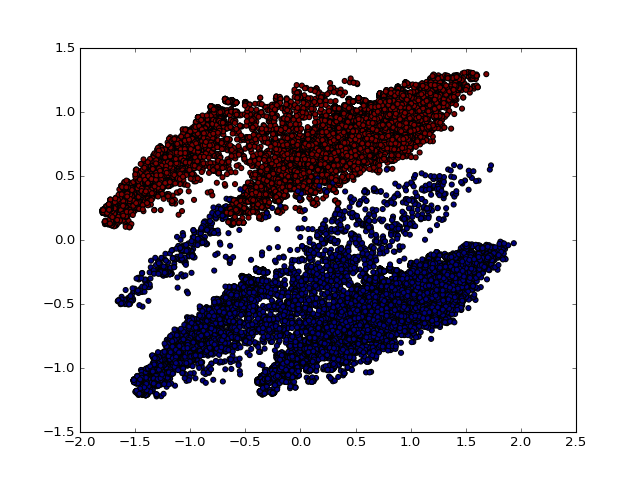

In [102]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.housing_no)

<IPython.core.display.Javascript object>


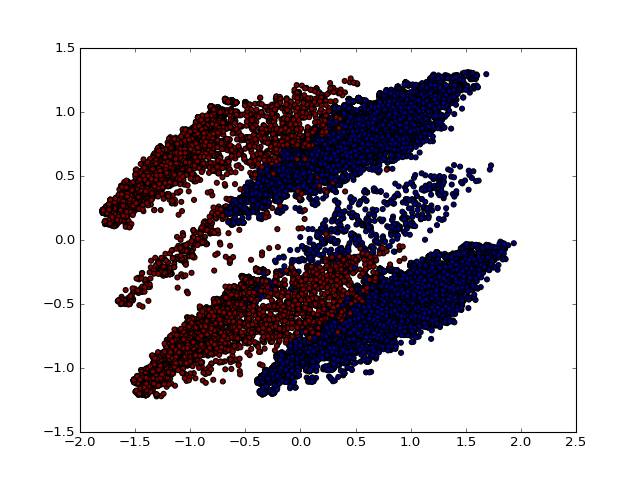

In [98]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.contact_telephone)

<IPython.core.display.Javascript object>


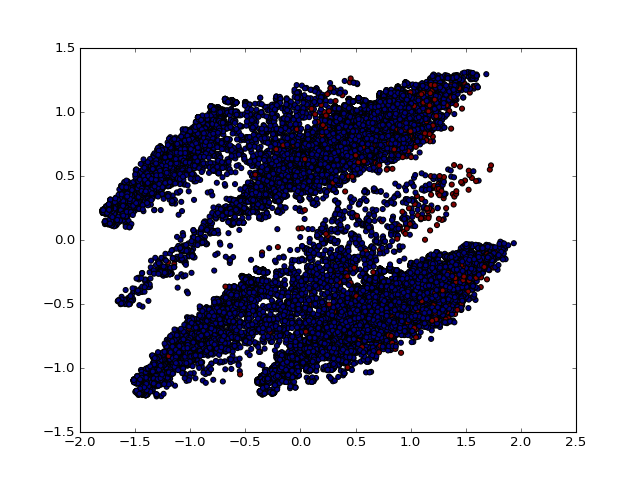

In [89]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds == -1)

<IPython.core.display.Javascript object>


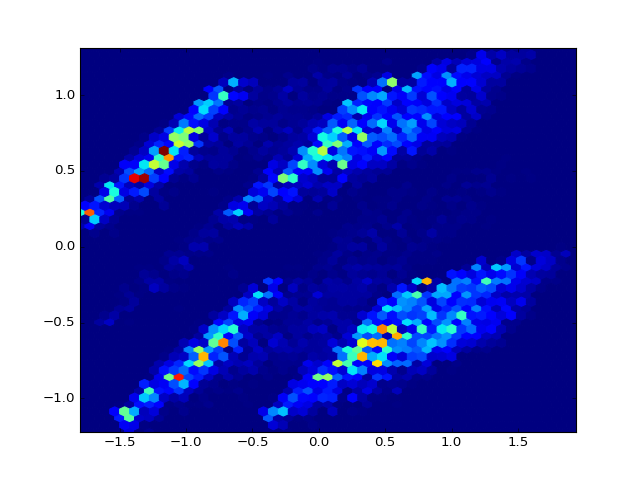

In [87]:
plt.figure()
plt.hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=50)

In [106]:
data_nophone_nohousing = data.drop(['housing_no', 'housing_unknown', 'housing_yes', 'contact_cellular', 'contact_telephone'], axis=1)

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(MinMaxScaler().fit_transform(data_nophone_nohousing.drop("target", axis=1)))

<IPython.core.display.Javascript object>


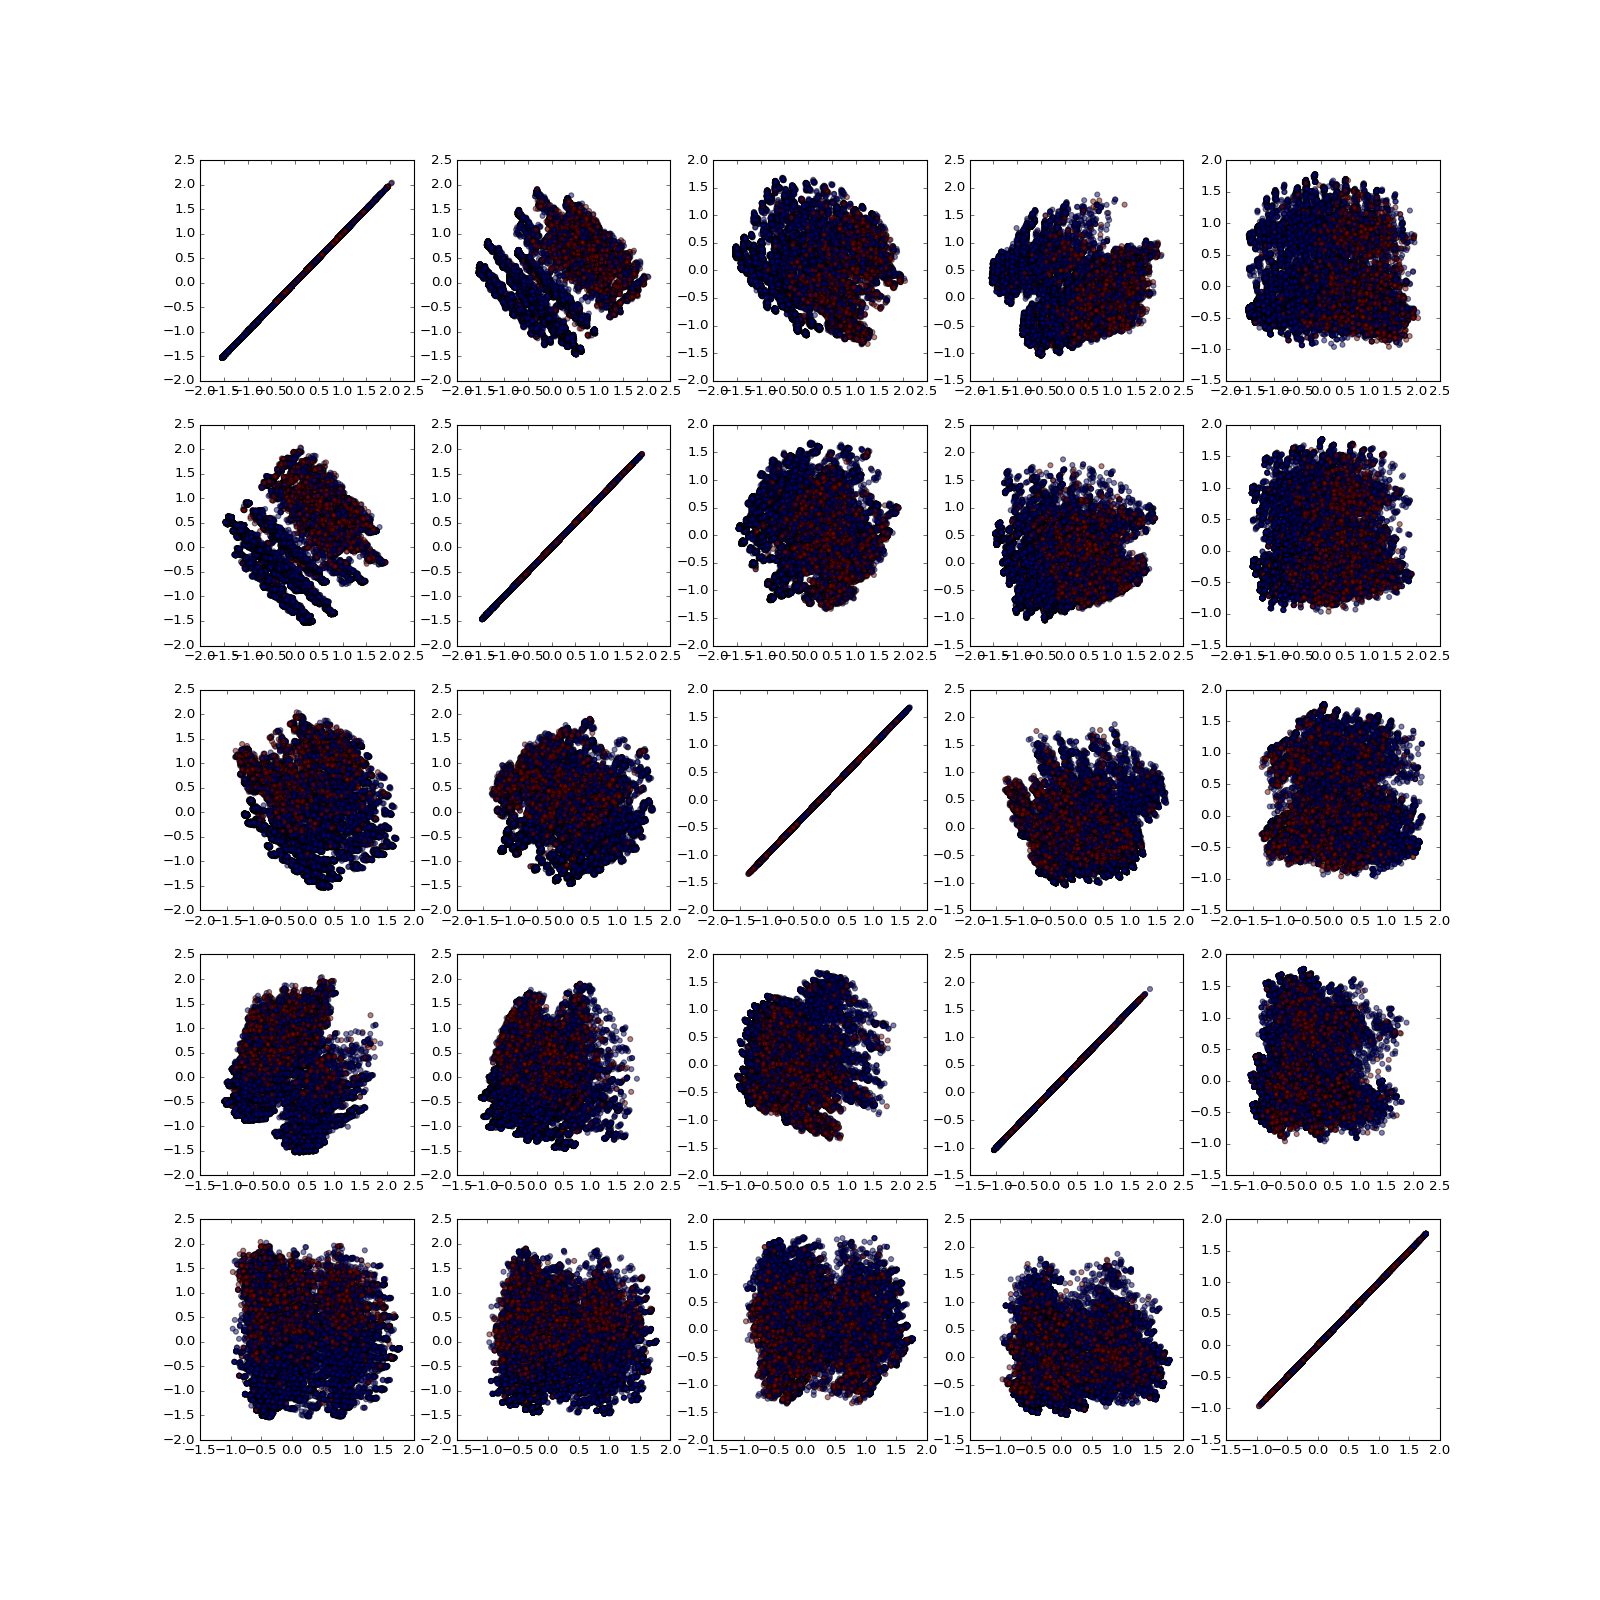

In [114]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        ax[i, j].scatter(X_pca[:, i], X_pca[:, j], c=data.target == "yes", alpha=.5)

<IPython.core.display.Javascript object>


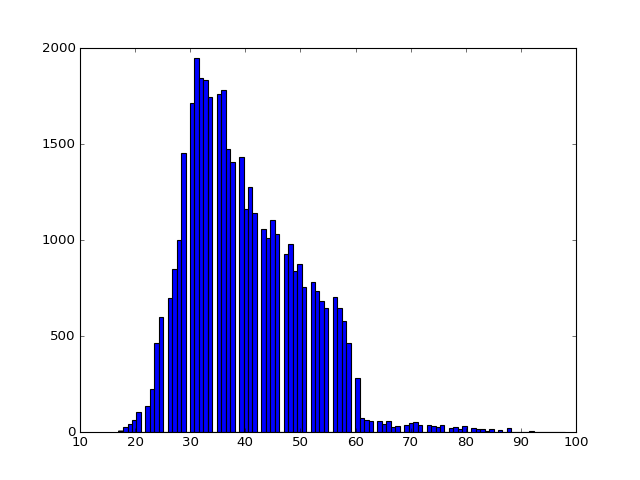

In [75]:
plt.figure()
plt.hist(data.age, bins=100);

In [70]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [117]:
data.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

# German Credit Card Fraud

In [3]:
from scipy.io.arff import loadarff
data = loadarff("data/german_credit_fraud.arff")

In [4]:
data[1]

Dataset: german_credit
	over_draft's type is nominal, range is ("'<0'", "'0<=X<200'", "'>=200'", "'no checking'")
	credit_usage's type is numeric
	credit_history's type is nominal, range is ("'no credits/all paid'", "'all paid'", "'existing paid'", "'delayed previously'", "'critical/other existing credit'")
	purpose's type is nominal, range is ("'new car'", "'used car'", 'furniture/equipment', 'radio/tv', "'domestic appliance'", 'repairs', 'education', 'vacation', 'retraining', 'business', 'other')
	current_balance's type is numeric
	Average_Credit_Balance's type is nominal, range is ("'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'", "'no known savings'")
	employment's type is nominal, range is ('unemployed', "'<1'", "'1<=X<4'", "'4<=X<7'", "'>=7'")
	location's type is numeric
	personal_status's type is nominal, range is ("'male div/sep'", "'female div/dep/mar'", "'male single'", "'male mar/wid'", "'female single'")
	other_parties's type is nominal, range is ('none', "'co applican

In [5]:
data = pd.DataFrame(data[0])

In [6]:
data.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,"b""'<0'""",6.0,"b""'critical/other existing credit'""",b'radio/tv',1169.0,"b""'no known savings'""","b""'>=7'""",4.0,"b""'male single'""",b'none',...,"b""'real estate'""",67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,"b""'0<=X<200'""",48.0,"b""'existing paid'""",b'radio/tv',5951.0,"b""'<100'""","b""'1<=X<4'""",2.0,"b""'female div/dep/mar'""",b'none',...,"b""'real estate'""",22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,"b""'no checking'""",12.0,"b""'critical/other existing credit'""",b'education',2096.0,"b""'<100'""","b""'4<=X<7'""",2.0,"b""'male single'""",b'none',...,"b""'real estate'""",49.0,b'none',b'own',1.0,"b""'unskilled resident'""",2.0,b'none',b'yes',b'good'
3,"b""'<0'""",42.0,"b""'existing paid'""",b'furniture/equipment',7882.0,"b""'<100'""","b""'4<=X<7'""",2.0,"b""'male single'""",b'guarantor',...,"b""'life insurance'""",45.0,b'none',"b""'for free'""",1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,"b""'<0'""",24.0,"b""'delayed previously'""","b""'new car'""",4870.0,"b""'<100'""","b""'1<=X<4'""",3.0,"b""'male single'""",b'none',...,"b""'no known property'""",53.0,b'none',"b""'for free'""",2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [8]:
data.own_telephone.value_counts()

b'none'    596
b'yes'     404
Name: own_telephone, dtype: int64

In [9]:
data.own_telephone = data.own_telephone == "yes"
data.foreign_worker = data.foreign_worker == "yes"

In [10]:
data.housing = data.housing.astype(str).str.strip("'b\"")

In [11]:
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = data[column].astype(str).str.strip("'b\"")

In [12]:
data['class'] = data['class'].replace("ad", "bad")

In [13]:
data[column].dtype == "object"

True

In [14]:
data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [15]:
data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,False,False,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,False,False,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,False,False,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,False,False,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,False,False,bad


In [16]:
data_dummies = pd.get_dummies(data.drop("class", axis=1))

In [17]:
data_dummies.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'own_telephone',
       'foreign_worker', 'over_draft_0<=X<200', 'over_draft_<0',
       'over_draft_>=200', 'over_draft_no checking', 'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_domestic appliance',
       'purpose_education', 'purpose_furniture/equipment', 'purpose_new car',
       'purpose_other', 'purpose_radio/tv', 'purpose_repairs',
       'purpose_retraining', 'purpose_used car', 'purpose_usiness',
       'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',


In [18]:
data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [19]:
from iforest import IsolationForest
iso = IsolationForest().fit(data_dummies.values)

AttributeError: 'ExtraTreeRegressor' object has no attribute 'decision_path'